Following notebook of [Omar Pena](https://www.kaggle.com/greyfaux/d/wendykan/lending-club-loan-data/state-statistics)

But then going to explore SQL a little bit on my own from the [examples](https://www.kaggle.com/jeffmoser/d/wendykan/lending-club-loan-data/total-loans-by-home-ownership/code) like by [Jeff Moser](https://www.kaggle.com/jeffmoser/d/wendykan/lending-club-loan-data/most-popular-job-titles/code)

Purpose is to test out porting between SQL to Python for data analysis and see how that goes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import style
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('loan.csv', low_memory=False, parse_dates=['issue_d'], infer_datetime_format=True)

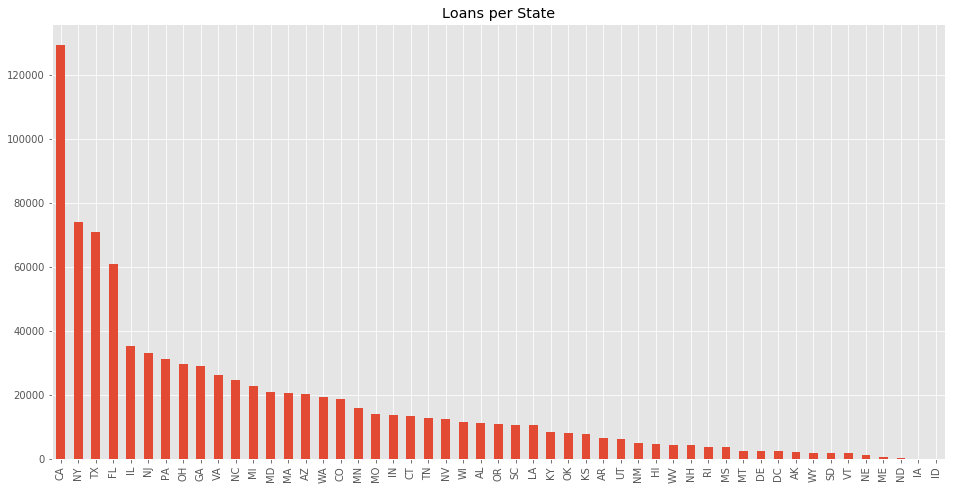

In [3]:
state_count = data.addr_state.value_counts()

state_count.plot(kind='bar', figsize=(16,8), title='Loans per State')

In [4]:
tn_data = data.loc[data.addr_state == 'TN']

tn_x = range(1, 12888)

tn_loan_amnt = tn_data.loan_amnt

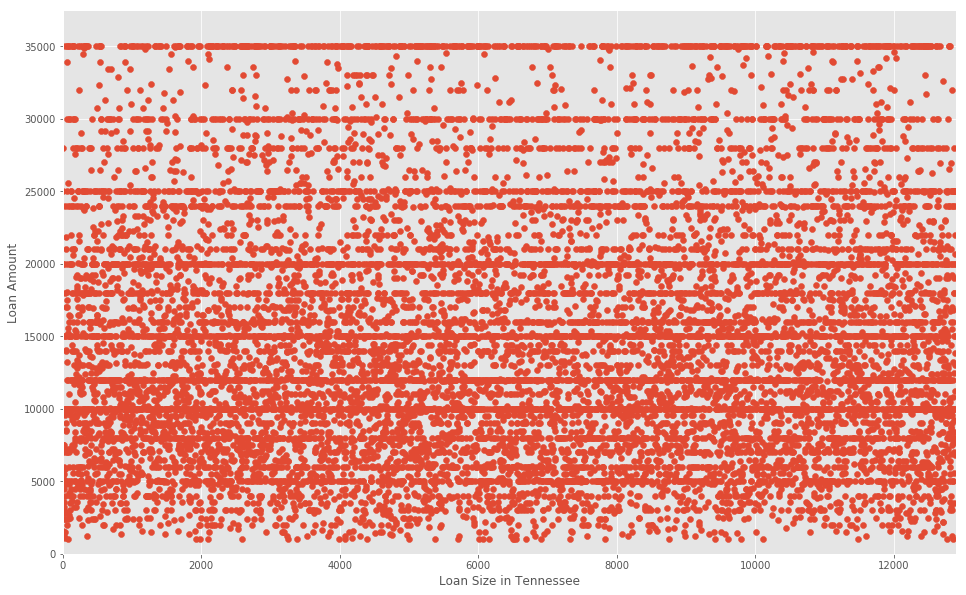

In [5]:
plt.figure(figsize=(16,10))
plt.scatter(tn_x, tn_loan_amnt)

plt.xlim(1, 12888)
plt.ylim(0, 37500)

plt.ylabel('Loan Amount')
plt.xlabel('Loan Size in Tennessee')

plt.show()

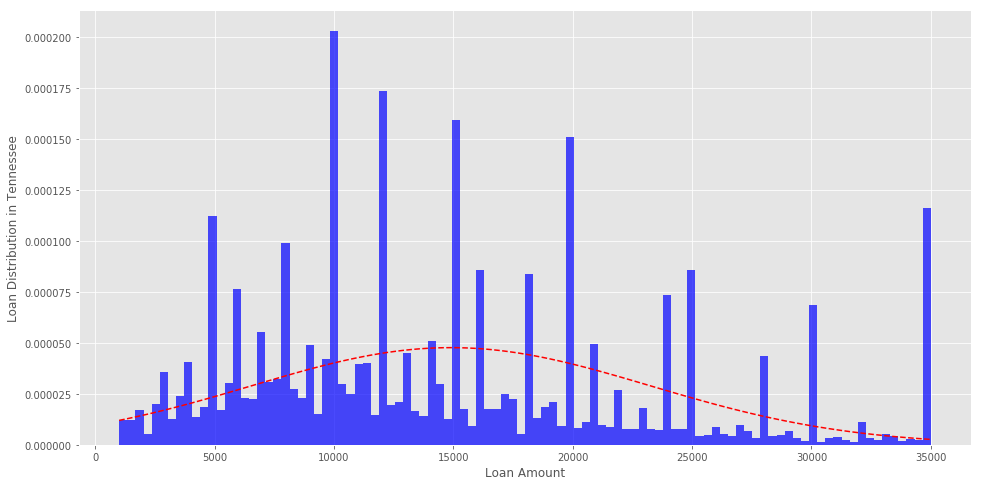

In [6]:
plt.figure(figsize=(16,8))

mu = tn_loan_amnt.mean()
sigma = tn_loan_amnt.std()
num_bins = 100

n, bins, patches = plt.hist(tn_loan_amnt, num_bins, normed=1, facecolor="blue", alpha=0.7)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')

plt.xlabel("Loan Amount")
plt.ylabel("Loan Distribution in Tennessee")
plt.show()

In [7]:
tloan_tn_df = tn_data['issue_d'].value_counts().sort_index()
tloan_tn_df = tloan_tn_df.cumsum()

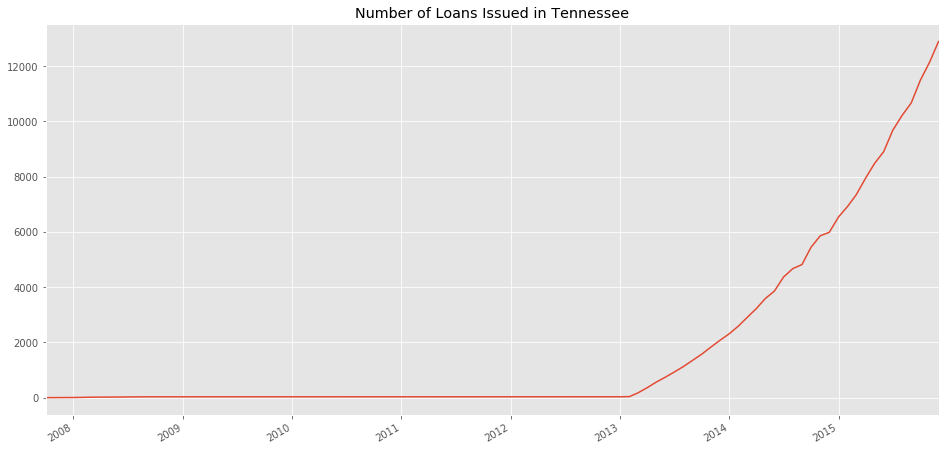

In [8]:
tloan_tn_df.plot(figsize=(16,8), title='Number of Loans Issued in Tennessee')

Next step is to take a look at other cities. This is quite some interesting plotting by Omar

First, let's take a look at how to build SQL in Jupyter, that's something I want to figure out

**For example:**

```sql
SELECT emp_title, COUNT(*) as total_loans
FROM loan
WHERE length(emp_title) > 0
GROUP BY emp_title
ORDER BY COUNT(*) DESC
LIMIT 100
```

In [12]:
from sqlalchemy import create_engine 
disk_engine = create_engine("sqlite:///database.sqlite")

In [13]:
df = pd.read_sql_query("SELECT * FROM loan LIMIT 3", disk_engine)

In [14]:
df.head()

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,...,None,None,None,None,None,None,None,None,None,None
1,1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,...,None,None,None,None,None,None,None,None,None,None
2,2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,...,None,None,None,None,None,None,None,None,None,None


In [16]:
df = pd.read_sql_query("""
                        SELECT emp_title, COUNT(*) as total_loans
                        FROM loan
                        WHERE length(emp_title) > 0
                        GROUP BY emp_title
                        ORDER BY COUNT(*) DESC
                        LIMIT 100                       
                       """, disk_engine)
df

,emp_title,total_loans
0,Teacher,13469
1,Manager,11240
2,Registered Nurse,5525
3,Owner,5376
4,RN,5355
5,Supervisor,4983
6,Sales,4212
7,Project Manager,3988
8,Driver,3569
9,Office Manager,3510


In [17]:
df = pd.read_sql_query("""
                        SELECT home_ownership, COUNT(*) AS total_loans
                        FROM loan
                        GROUP BY home_ownership
                        ORDER BY COUNT(*) DESC                    
                       """, disk_engine)
df

,home_ownership,total_loans
0,MORTGAGE,443558
1,RENT,356118
2,OWN,87471
3,OTHER,182
4,NONE,50
5,ANY,3
6,None,1
